#### Student Performance Indicator
##### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem statement

    This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection

    Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    The data consists of 8 column and 1000 rows.

##### Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

##### Importing Lib

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
plt.style.use('ggplot')
import plotly.express as px

##### Loading data

In [2]:
df = pd.read_csv('data/stud.csv')

##### Preview the data

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Shape of records

In [4]:
df.shape

(1000, 8)

##### Dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### Checking for missing and duplicates values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

##### There are no single missing values

##### Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

##### Extracting all categorical columns

In [10]:
cat_col = [col for col in df.columns if df[col].dtype == "O"]
cat_col

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

##### Checking for unique value of all categorical values

In [11]:
def get_unique_values(data, categorical_columns):
    unique_values = {}
    for column in categorical_columns:
        unique_values[column] = list(data[column].unique())
    return unique_values

In [12]:
unique_values = get_unique_values(df,cat_col)
for column, values in unique_values.items():
    print(f"Categories in {column} : {values}")

Categories in gender : ['female', 'male']
Categories in race_ethnicity : ['group B', 'group C', 'group A', 'group D', 'group E']
Categories in parental_level_of_education : ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
Categories in lunch : ['standard', 'free/reduced']
Categories in test_preparation_course : ['none', 'completed']


##### Counting numerical and categorical cols in dataset

In [13]:
numerical_cols = []
categorical_cols = []
def count_cat_num_cols(df):
    for col in df.columns:
        if df[col].dtype == "O":
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)
count_cat_num_cols(df)

In [14]:
print(f"We have {len(numerical_cols)} numerical features")
print(f"We have {len(categorical_cols)} categorical features")

We have 3 numerical features
We have 5 categorical features


##### Adding columns for "Total Score" and "Average"

In [15]:
df['Total_avg'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_avg'] / 3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_avg,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### Checking how many of student are getting full marks

In [52]:
def check_full_marks(ls_features):
    for col in ls_features:
        scores = df[df[col]==100]['Average'].count()
        print(f"Number of students with full marks in {col} : {scores}")

In [53]:
check_full_marks(['reading_score','writing_score','math_score'])

Number of students with full marks in reading_score : 17
Number of students with full marks in writing_score : 14
Number of students with full marks in math_score : 7


##### Checking how many students are getting less 20 marks or fail

In [54]:
def check_less_marks(ls_features):
    for col in ls_features:
        scores = df[df[col]<=20]['Average'].count()
        print(f"Number of students with less than 20 marks in {col} : {scores}")

In [55]:
check_less_marks(['reading_score','writing_score','math_score'])

Number of students with less than 20 marks in reading_score : 1
Number of students with less than 20 marks in writing_score : 3
Number of students with less than 20 marks in math_score : 4


##### Insight
- From above value we can say that student perform very worst in math
- Best performance in reading 

##### Exploring Data ( Visualization )

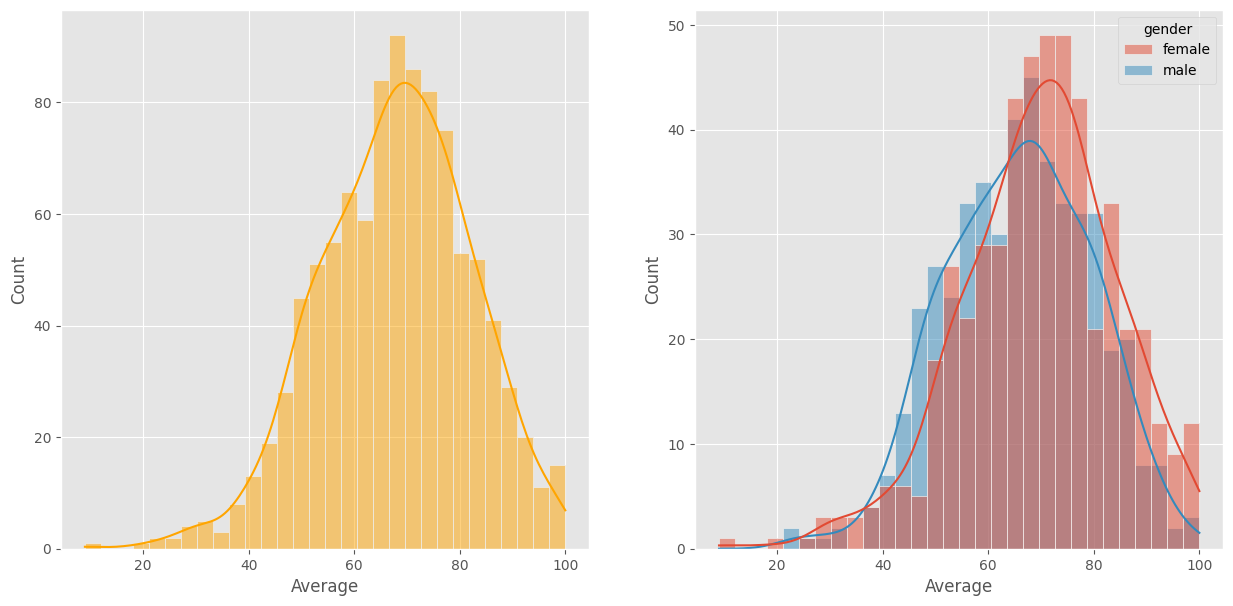

In [78]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df,x='Average',bins=30,kde=True,color='orange')
plt.subplot(122)
sns.histplot(df,x='Average',bins=30,kde=True,color='red',hue='gender')
plt.show()

##### Insights
- From above histogram we can say that female gender having high avg marks

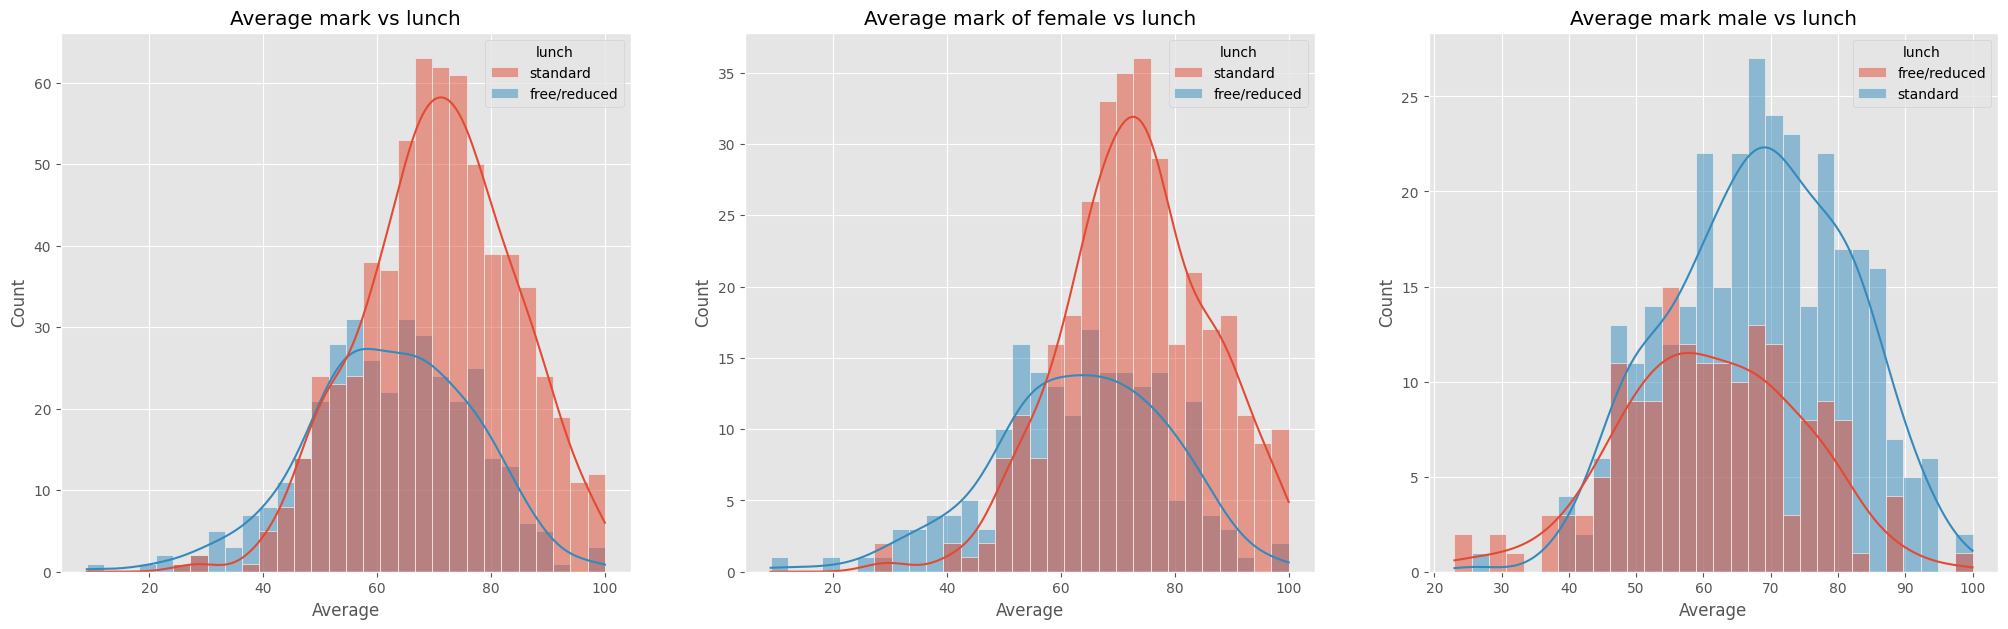

In [101]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(131)
plt.title('Average mark vs lunch')
sns.histplot(df,x='Average',bins=30,kde=True,hue='lunch')
plt.subplot(132)
plt.title('Average mark of female vs lunch')
sns.histplot(df[df['gender']=='female'],x='Average',bins=30,kde=True,hue='lunch')
plt.subplot(133)
plt.title('Average mark male vs lunch')
sns.histplot(df[df['gender']=='male'],x='Average',bins=30,kde=True,hue='lunch')
plt.show()

##### Insights
- From above histogram we can say that standard luch helps both gender to perform well in exams

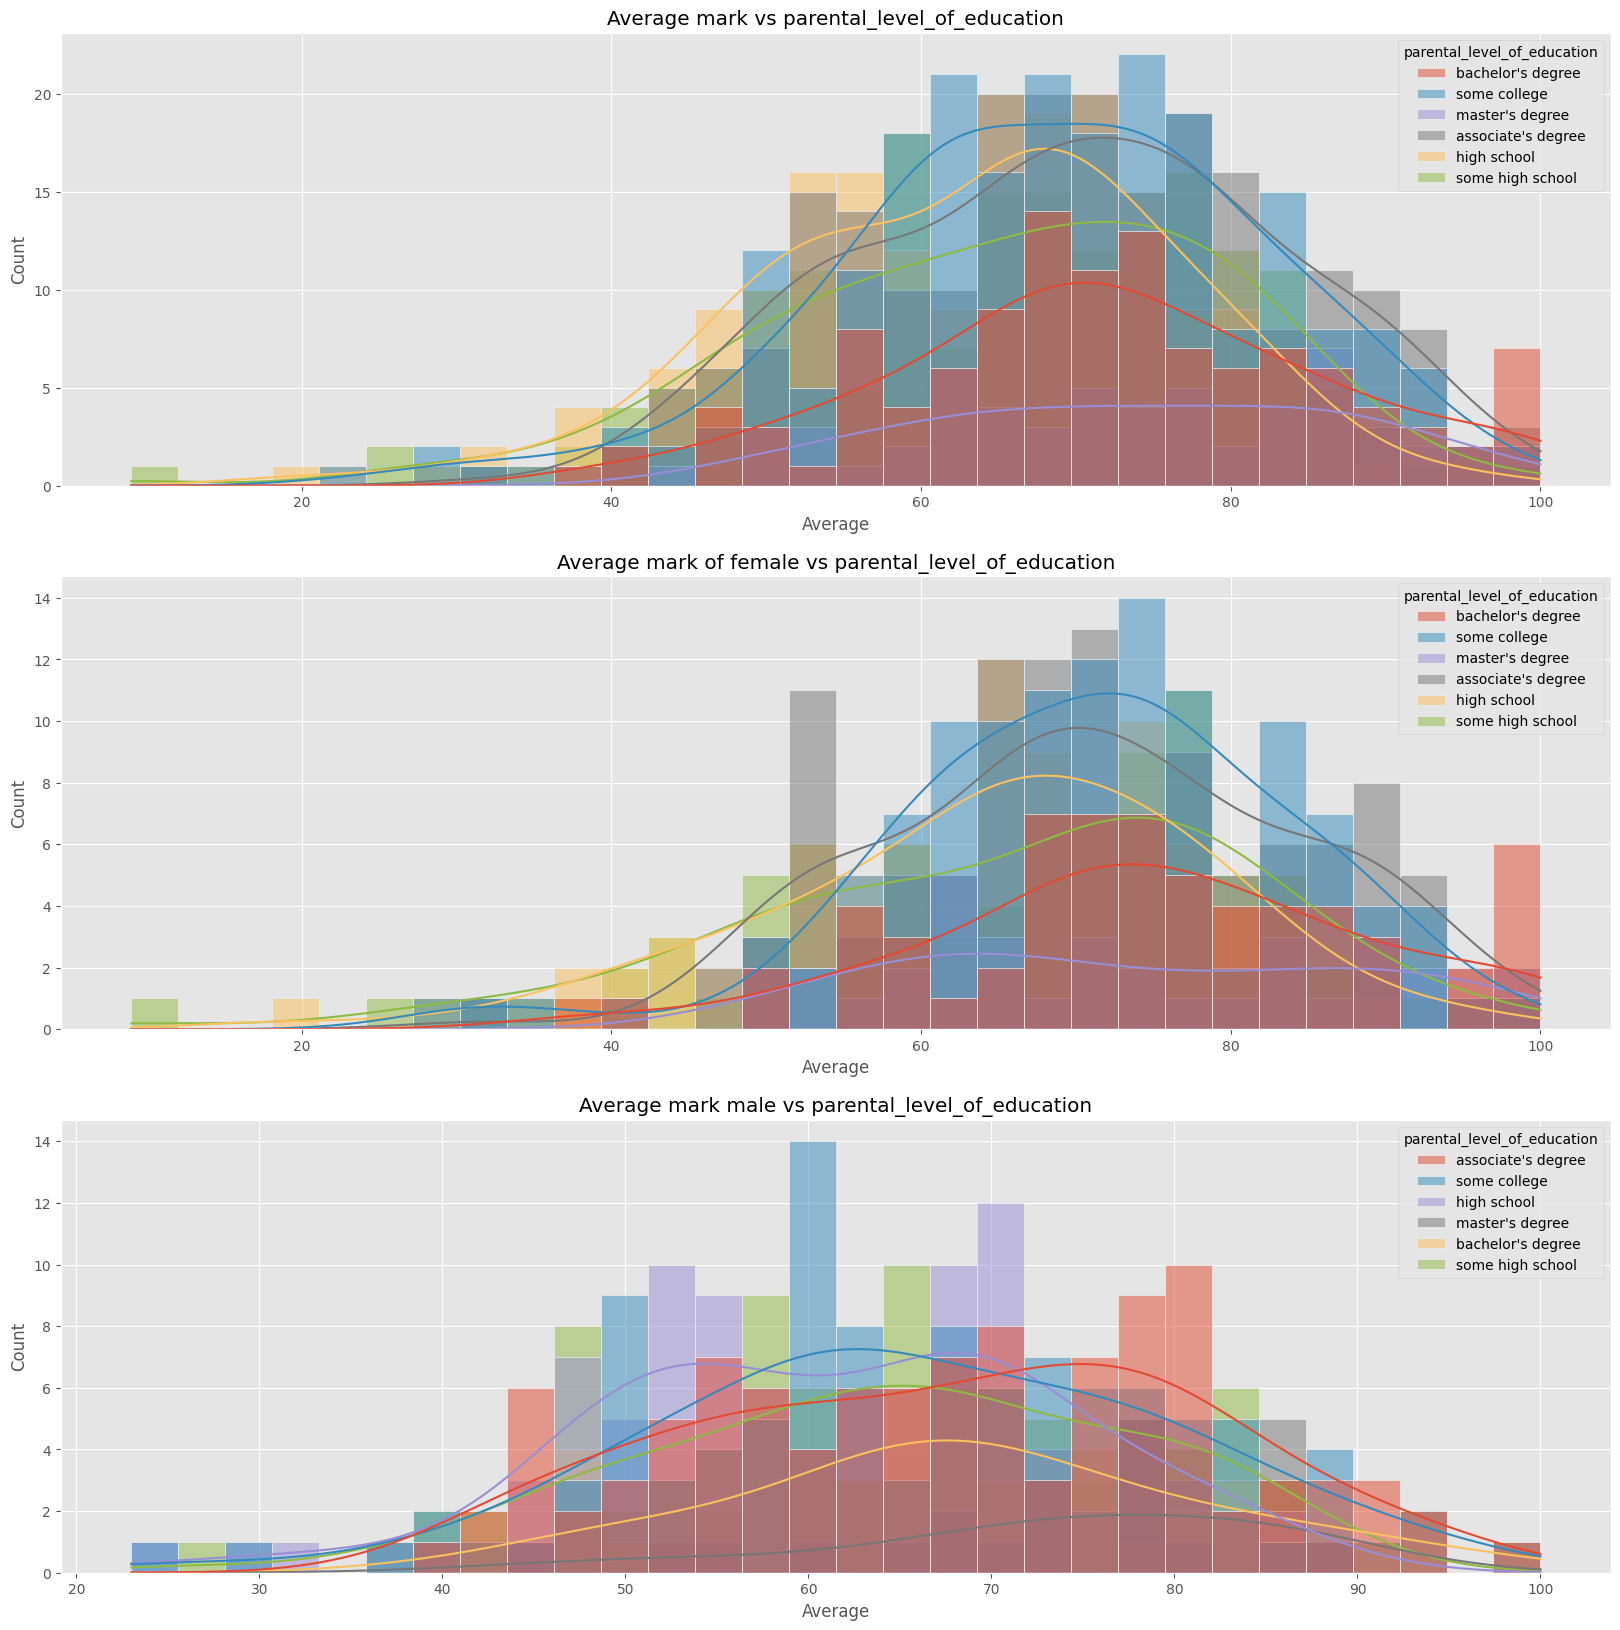

In [110]:
plt.subplots(3,1,figsize=(20,20))
plt.subplot(311)
plt.title('Average mark vs parental_level_of_education')
sns.histplot(df,x='Average',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(312)
plt.title('Average mark of female vs parental_level_of_education')
sns.histplot(df[df['gender']=='female'],x='Average',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(313)
plt.title('Average mark male vs parental_level_of_education')
sns.histplot(df[df['gender']=='male'],x='Average',bins=30,kde=True,hue='parental_level_of_education')
plt.show()

##### Insight
- From above histogram we can say that the performance of student has not effect of parent's education 

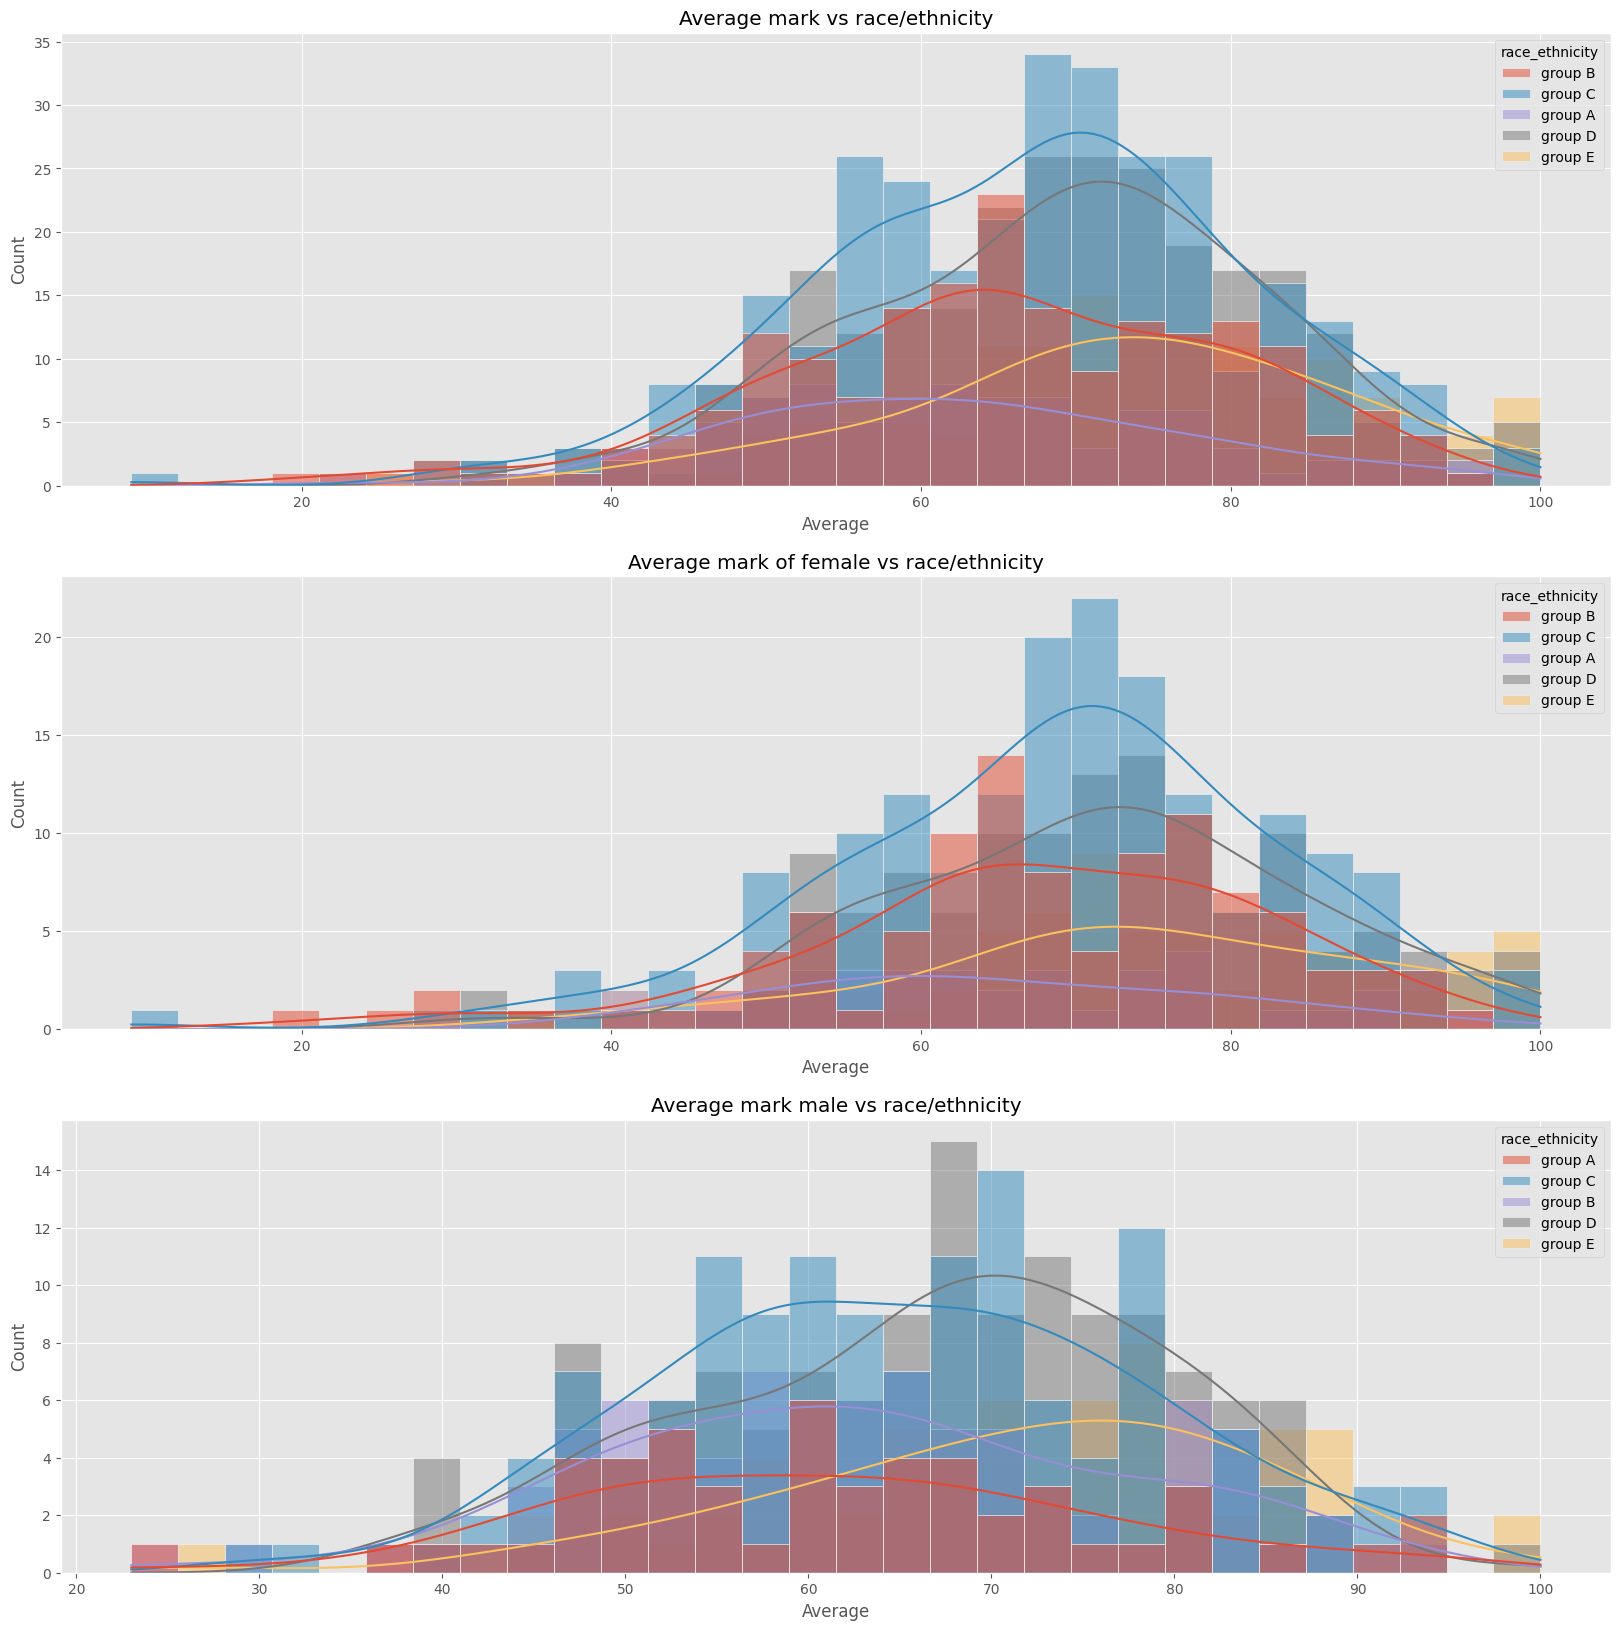

In [112]:
plt.subplots(3,1,figsize=(20,20))
plt.subplot(311)
plt.title('Average mark vs race/ethnicity')
sns.histplot(df,x='Average',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(312)
plt.title('Average mark of female vs race/ethnicity')
sns.histplot(df[df['gender']=='female'],x='Average',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(313)
plt.title('Average mark male vs race/ethnicity')
sns.histplot(df[df['gender']=='male'],x='Average',bins=30,kde=True,hue='race_ethnicity')
plt.show()

##### Insight
- Students of group A and B performing poor in exams

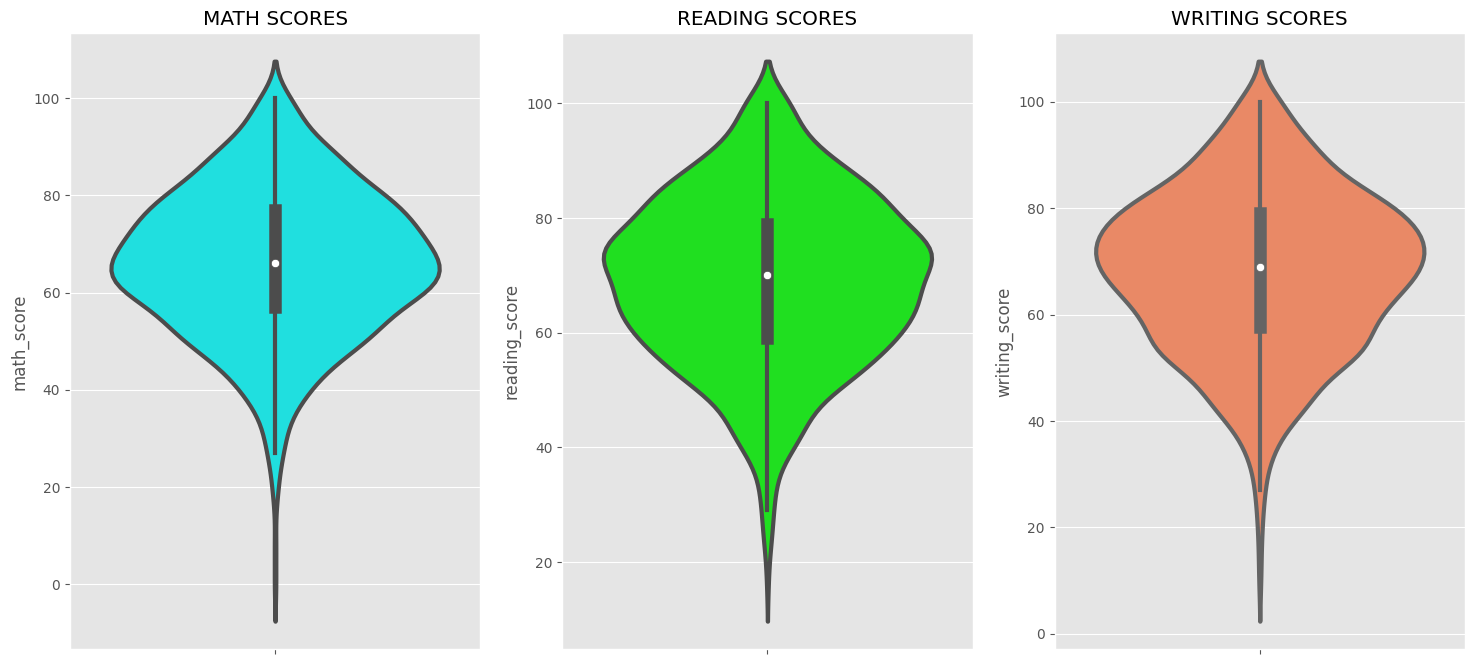

In [130]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(131)
plt.title('MATH SCORES')
sns.violinplot(df,y='math_score',color='cyan',linewidth=3)
plt.subplot(132)
plt.title('READING SCORES')
sns.violinplot(df,y='reading_score',color='lime',linewidth=3)
plt.subplot(133)
plt.title('WRITING SCORES')
sns.violinplot(df,y='writing_score',color='coral',linewidth=3)
plt.show()

- from above violin graph we can say that  the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

##### Multivariate analysis using pieplot

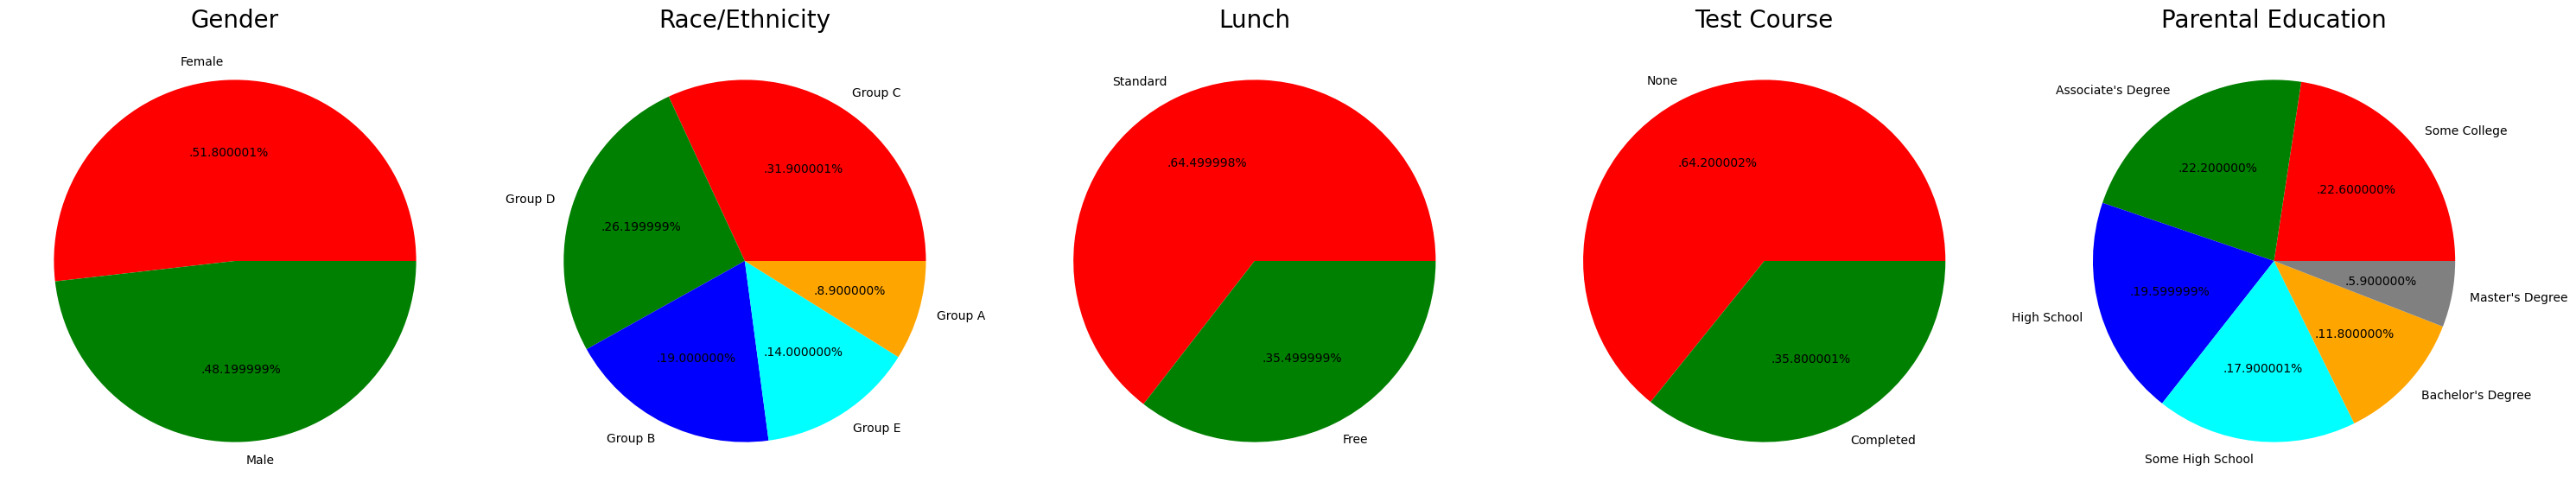

In [137]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


##### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

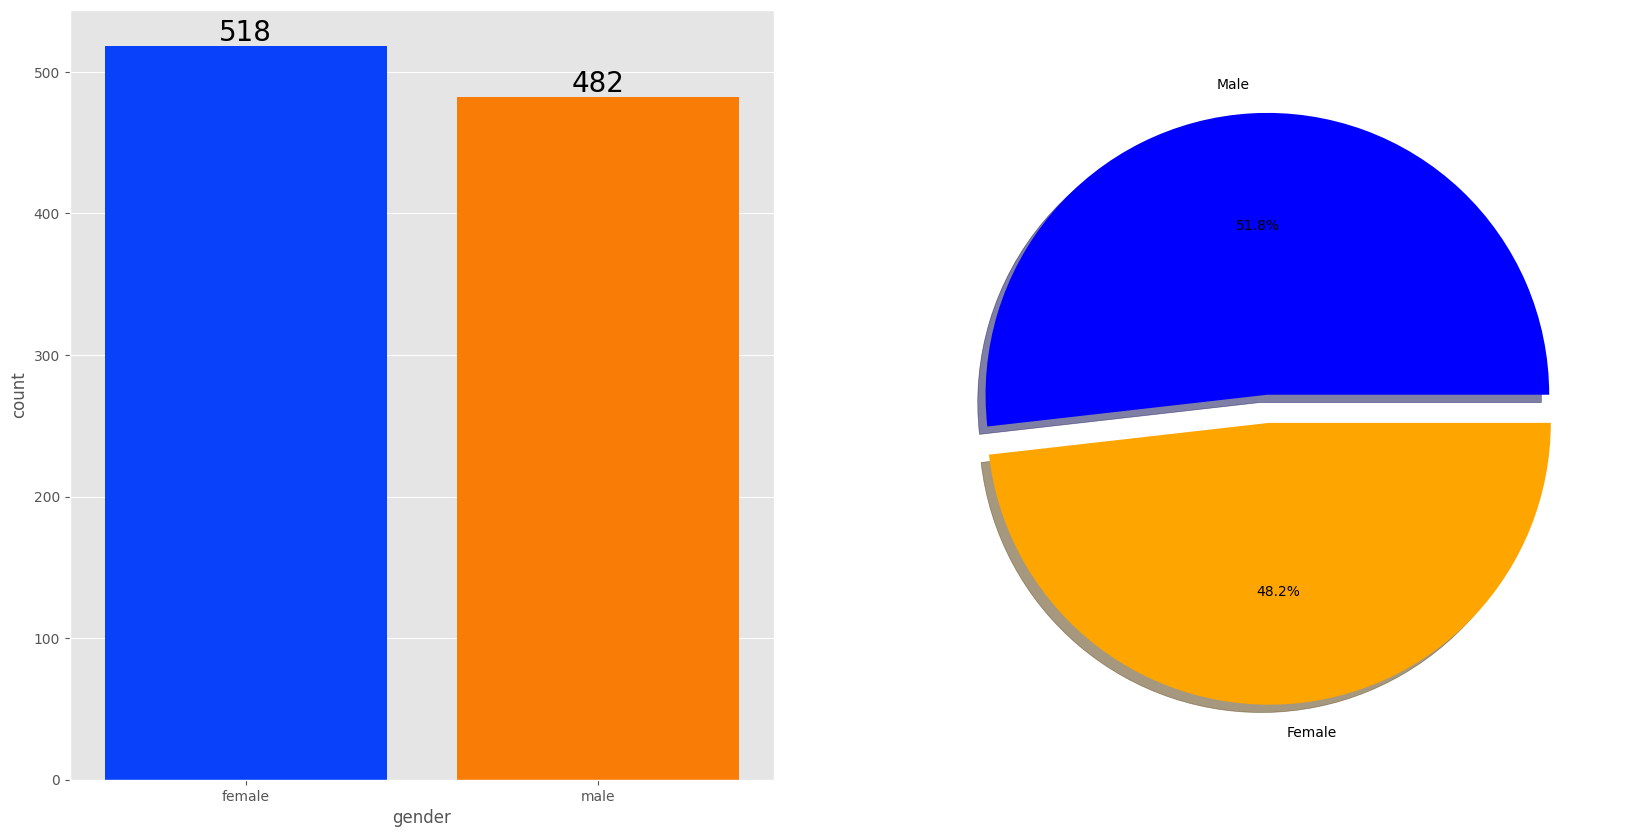

In [141]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['blue','orange'])
plt.show()

##### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

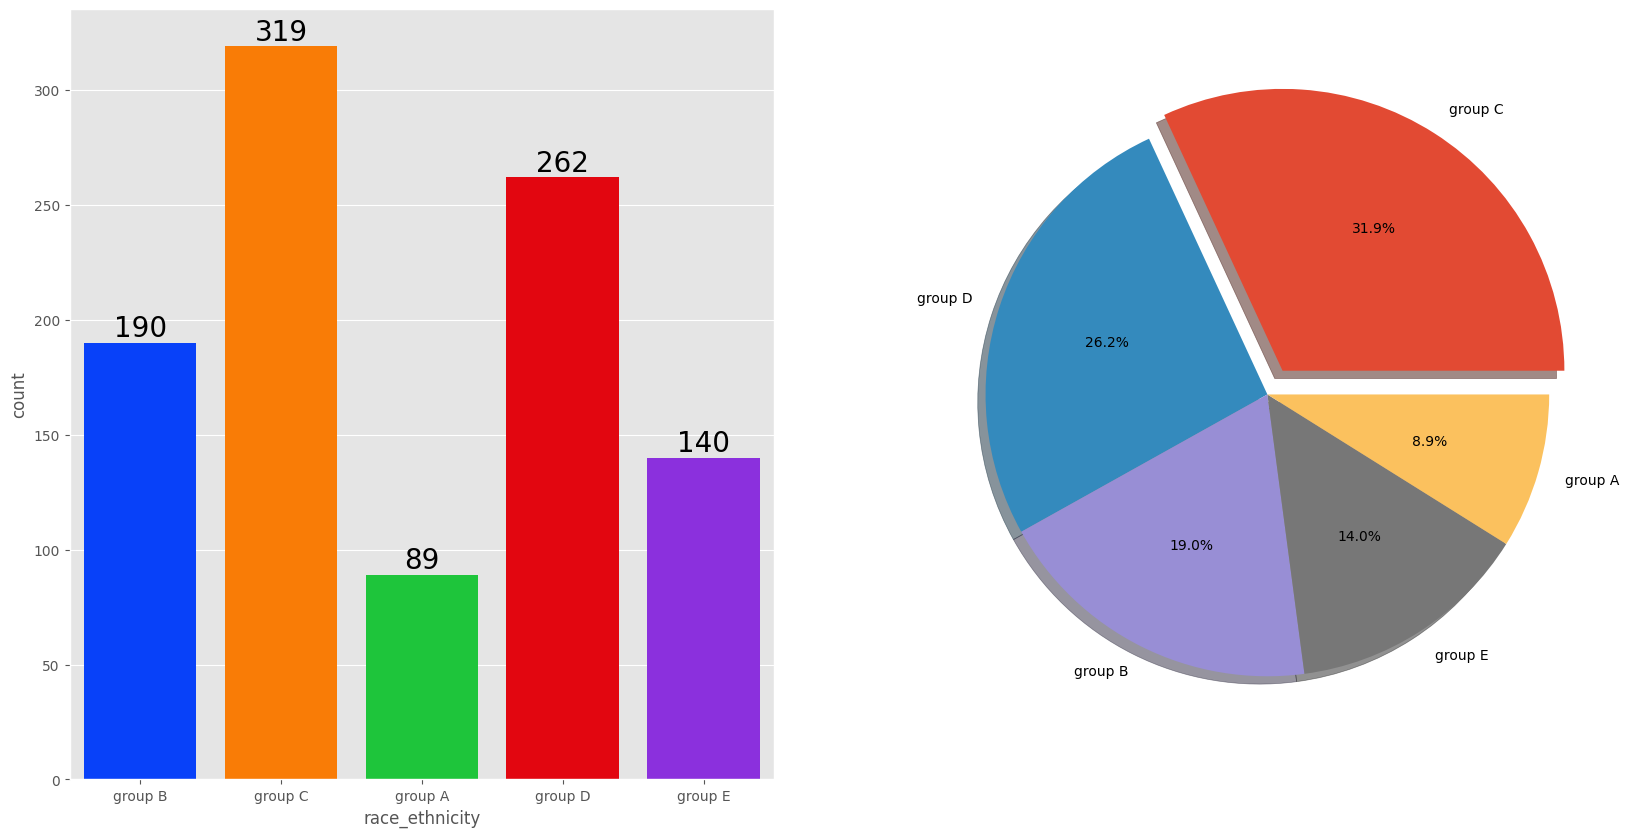

In [173]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

##### Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

##### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [143]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,Total_avg,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


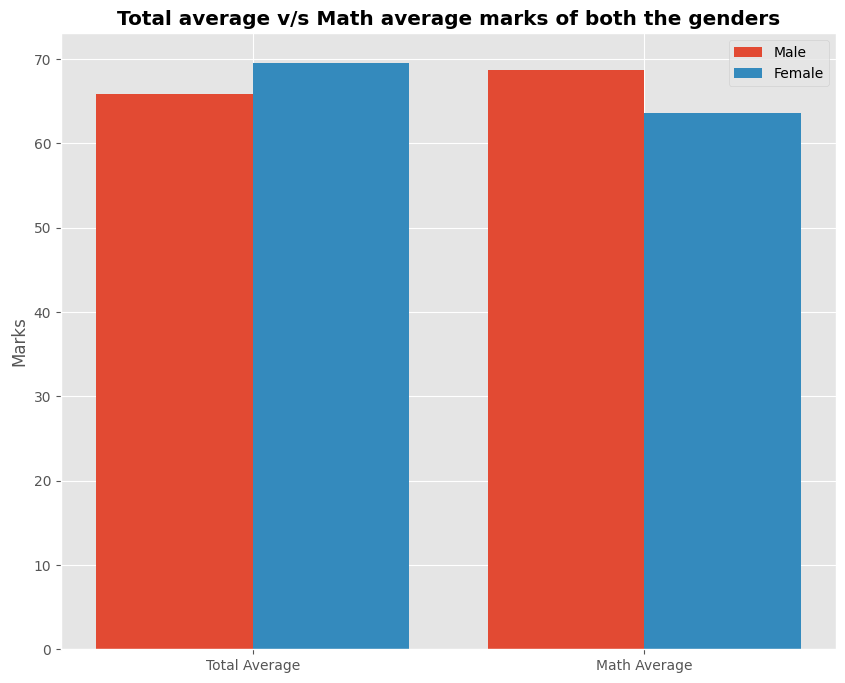

In [167]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights
- On an average females have a better overall score than men. 
- whereas males have scored higher in Maths.

##### Checking outlier

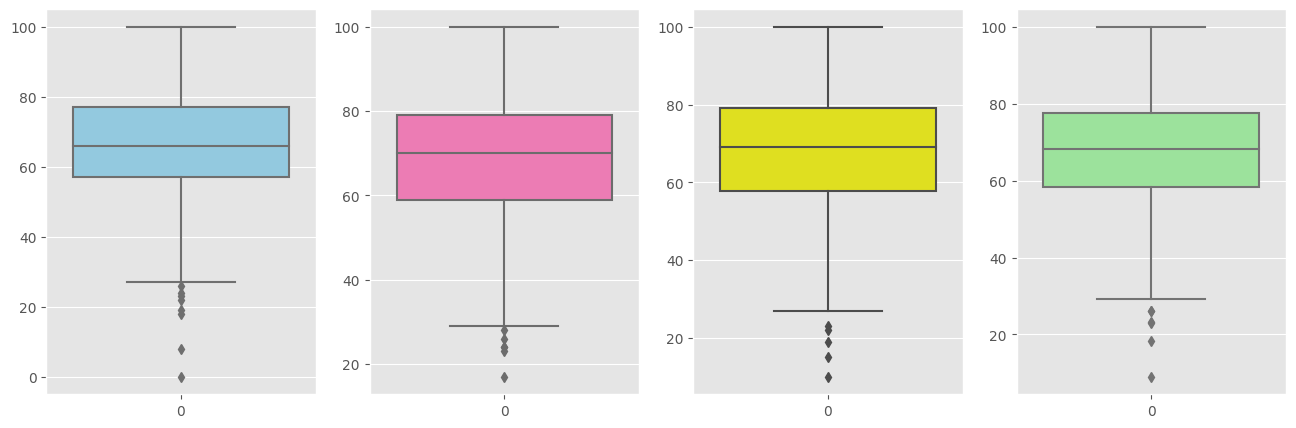

In [175]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

##### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.